# Spaceship Linear Support Vector Classifier (LinearSVC) Submission

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn 

# Bring the Data In

In [2]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Ini buat ganti y_train and y_test ke 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

# Model!

We'll be playing with the 'C' coefficient. 

- Lower 'C' value: higher regularization, model coefficients are close to 0.

- Higher 'C' value: lower regularization, fit the training data more.

In [8]:
from sklearn.svm import LinearSVC

# Testing with multiple 'C' coefficient values
c_range = np.linspace(1, 50, 100)
training_accuracy = []
testing_accuracy = []

for c in c_range:
    svc = LinearSVC(C=c).fit(X_train, y_train)
    training_accuracy.append(svc.score(X_train, y_train))
    testing_accuracy.append(svc.score(X_test, y_test))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Conv

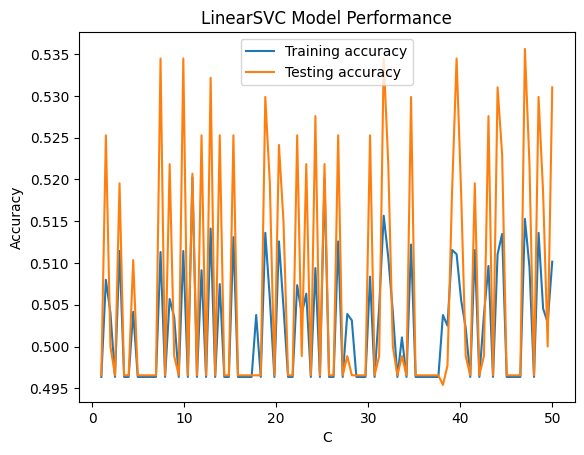

In [5]:
svc_performance = {'c':c_range, 'training_accuracy':training_accuracy, 'testing_accuracy':testing_accuracy}
svc_performance = pd.DataFrame(svc_performance)
sns.lineplot(data=svc_performance, x='c', y='training_accuracy', label='Training accuracy')
sns.lineplot(data=svc_performance, x='c', y='testing_accuracy', label='Testing accuracy')

plt.title("LinearSVC Model Performance")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [10]:
svc_performance.sort_values(by='testing_accuracy', ascending=False)

,c,training_accuracy,testing_accuracy
93,47.030303,0.515275,0.535632
62,31.686869,0.515659,0.534483
78,39.606061,0.511057,0.534483
18,9.909091,0.511441,0.534483
13,7.434343,0.511313,0.534483
...,...,...,...
35,18.323232,0.496357,0.496552
34,17.828283,0.503771,0.496552
33,17.333333,0.496357,0.496552
50,25.747475,0.496357,0.496552


## Takeaway

In this case, we will proceed with C=47.03

# Submission Prediction

In [11]:
clf = LinearSVC(C=47.03)

# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
clf.fit(X_df, y_df['Transported'].values)

# Generate prediction for spaceship_test_X_v2.csv
y_prediction = clf.predict(X_submission)
print(y_prediction)

[0 0 0 ... 1 1 1]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [13]:
submission_dict.to_csv('spaceship_linearsvc_c47_submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>